### Trading using the Black-Scholes Model


#### Solving the Black-Scholes Equation Yields
$$C = S_t \Phi(d_1) - Ke^{-rt} \Phi(d_2)$$

$$\Phi(x) = \int_{-\infty}^x \frac{1}{\sqrt{2\pi}}e^{\frac{-s^2}{2}}ds$$

$$d_1 = \frac{ln(\frac{S_t}{K})+(r+\frac{\sigma^2}{2})t}{\sigma \sqrt{t}}$$

$$d_2 = d_1 - \sigma \sqrt{t}$$

$$\frac{dS_t}{S_t} = \mu dt + \sigma dW_t$$

In [7]:
import numpy as np
from scipy.stats import norm

def black_scholes_call(S, K, sigma, r, t):
    d1 = (np.log(S/K) + (r + ((sigma**2)/2))*t) / (sigma * np.sqrt(t))
    d2 = d1 - (sigma * np.sqrt(t))
    C = S * norm.cdf(d1) - K * np.exp(-r*t) * norm.cdf(d2)
    return C

black_scholes_call(100, 100, 0.2608, .01169, 3)

19.336129738771618

### Making and Losing Money Trading Options




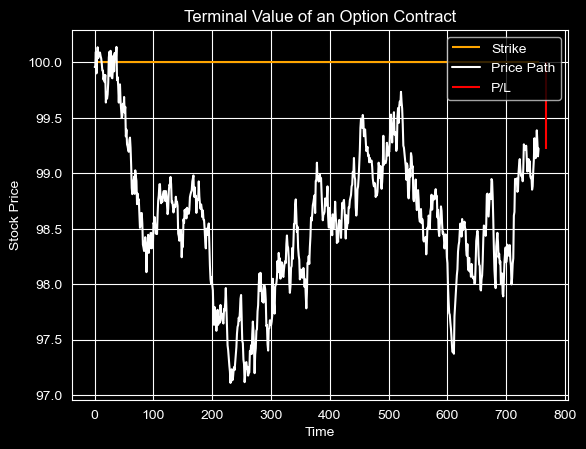

Premium at t=0: 23.3778823489856
P/L: -23.3778823489856


In [8]:
import matplotlib.pyplot as plt
import qfin as qf

# simulate dynamics of the underlying according to Geometric Brownian Motion
path = qf.simulations.GeometricBrownianMotion(100, 0.011, 0.03, 1/756, 1)


# create a chart of the price path and the strike price
plt.title("Terminal Value of an Option Contract")
plt.hlines(100, 0, 756, label='Strike', color='orange')
plt.plot(path.simulated_path, label='Price Path', color='white')
if max(path.simulated_path[-1] - 100, 0) == 0:
    plt.vlines(767, path.simulated_path[-1], 100, color='red', label="P/L")
else:
    plt.vlines(756, 100, path.simulated_path[-1], color='green', label="P/L")
plt.style.use('dark_background')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# print the premium and the resulting P/L
print("Premium at t=0:", black_scholes_call(100, 100, 0.2608, .04207, 3))
print("P/L:", max(path.simulated_path[-1] - 100, 0) - black_scholes_call(100, 100, 0.2608, .04207, 3))

### How to Make Money using the Black-Scholes Model

Let $T$ be a trading strategy such that options are bought/sold when there is a theoretical discrepency between the model price and market maker quote.

$$\mathbb{E}T > 0 \implies \text{ Positive P/L Over Time}$$

In [9]:
print("Call Price:", black_scholes_call(100, 100, .3, .05, 1))
print("Market Maker Quote:", "13.43 @ 14.10")
print("Trade Edge:", black_scholes_call(100, 100, .3, .05, 1) - 14.10)

Call Price: 14.231254785985819
Market Maker Quote: 13.43 @ 14.10
Trade Edge: 0.13125478598581886


### Computing the P/L Edge with Respect to the Model Dynamics

In [10]:
premium = 0 * 100
pls = []

for i in range(100000):
    path = qf.simulations.GeometricBrownianMotion(100, 0.05, .3, 1/252, 1)
    pls.append(max(path.simulated_path[-1] - 100, 0)*100 - premium)

np.mean(pls)

1505.2336941368408

In [11]:
payoff = []
for i in range(10000):
    path = qf.simulations.GeometricBrownianMotion(100, 0.05, .3, 1/252, 1)
    if max(path.simulated_path[-1] - 100, 0) > 150:
        payoff.append(0)
    if max(path.simulated_path[-1] - 100, 0) < 150:
        payoff.append(max(path.simulated_path[-1] - 100, 0))

np.mean(payoff)

14.879951969975698

### Simulating an Equity Curve Assuming Underlying Dynamics

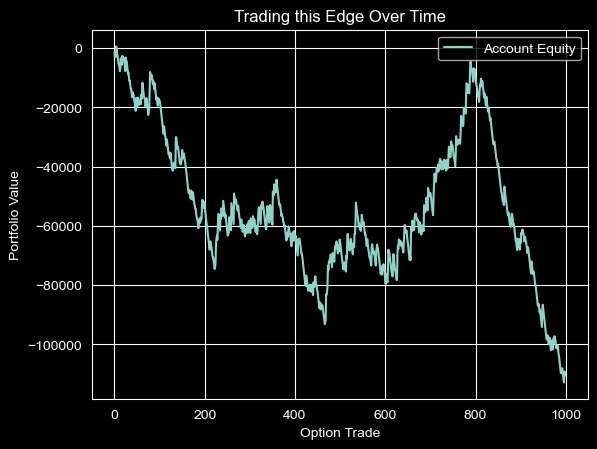

In [12]:
premium = 14.10 * 100
pls = []

for i in range(1000):
    path = qf.simulations.GeometricBrownianMotion(100, 0.05, 0.25, 1/252, 1)
    pls.append(max(path.simulated_path[-1] - 100, 0)*100 - premium)

plt.title("Trading this Edge Over Time")
plt.plot(np.cumsum(pls), label="Account Equity")
plt.style.use('dark_background')
plt.xlabel('Option Trade')
plt.ylabel('Portfolio Value')
plt.legend()
plt.show()

### Some Issues Trading Model Prices

- Non-stationarity in parameterization
- Volatility is not constant and lacks clustering heuristic
- Dynamics do not include jumps
- etc.